"고객 유지를 위한 행동을 예측합니다. 관련된 모든 고객 데이터를 분석하고 집중적인 고객 유지 프로그램을 개발할 수 있습니다."

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

* 지난 달에 떠난 고객 - 해당 열은 Churn이라고 합니다.
* 각 고객이 등록한 서비스 – 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, TV 및 영화 스트리밍
* 고객 계정 정보 - 고객 유지 기간, 계약, 결제 방법, 전자 청구서, 월별 요금, 총 요금
* 고객에 대한 인구통계 정보 – 성별, 연령대, 파트너 및 부양가족 유무

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# TotalCharges의 데이터가 수치임에도 object타입으로 되어있어 수치형으로 변환
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

In [8]:
# 기술통계 찍을 때 int형이라 같이 출력되어서 categorical 변수이기 때문에 int가 아닌 object형으로 변환
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['SeniorCitizen'].dtype

dtype('O')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# 많은 데이터 중 단 11개에만 결측치가 있으므로 결측치는 제거한다.
df = df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65


## EDA

<Axes: xlabel='Churn', ylabel='count'>

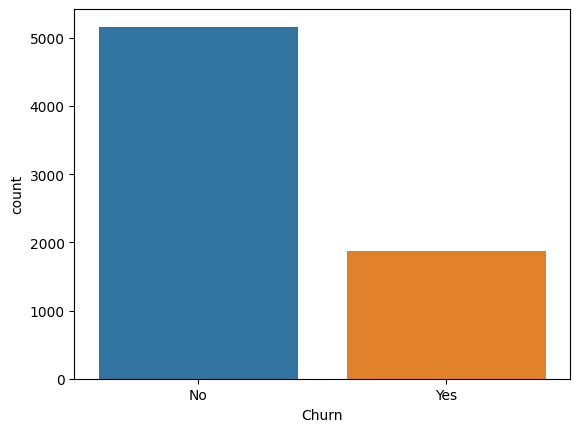

In [13]:
sns.countplot(data=df, x="Churn", hue="Churn", legend=False)

데이터가 불균형함

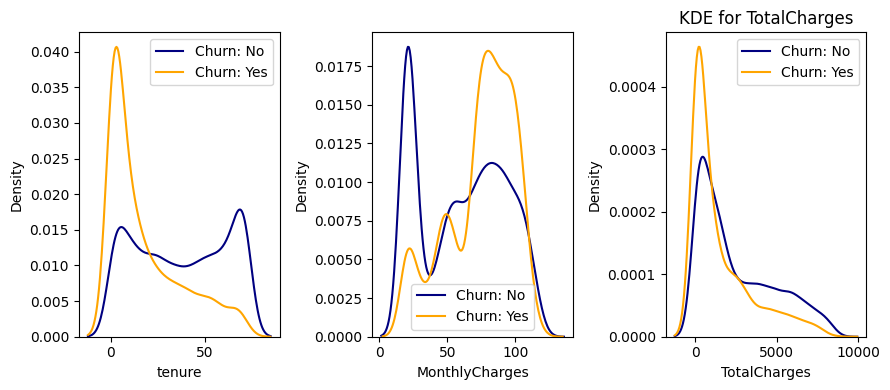

In [14]:
fig, axes = plt.subplots(1,3, figsize=(9,4))
for ax, feature in zip(axes, df_numeric.columns):
    plt.title(f"KDE for {feature}")
    sns.kdeplot(df[df["Churn"] == "No"][feature].dropna(), color = 'navy', label='Churn: No', ax=ax)
    sns.kdeplot(df[df["Churn"] == "Yes"][feature].dropna(), color = 'orange', label='Churn: Yes', ax=ax)
    ax.legend()

plt.tight_layout()
plt.show()

그래프를 통해 알 수 있는 것
- 최근에 유입된 고객일 수록 이탈 가능성이 더 높음.
- 월간 요금이 높은 고객이 이탈 가능성이 더 높음.
- TotalCharges 변수보단 Tenure 와 MonthlyCharges가 더 중요한 feature로 작용함.

In [15]:
nunique = df.nunique()
category_col_name = nunique[nunique < 5]
category_col_name

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [16]:
category_col = category_col_name.index.tolist()
category_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

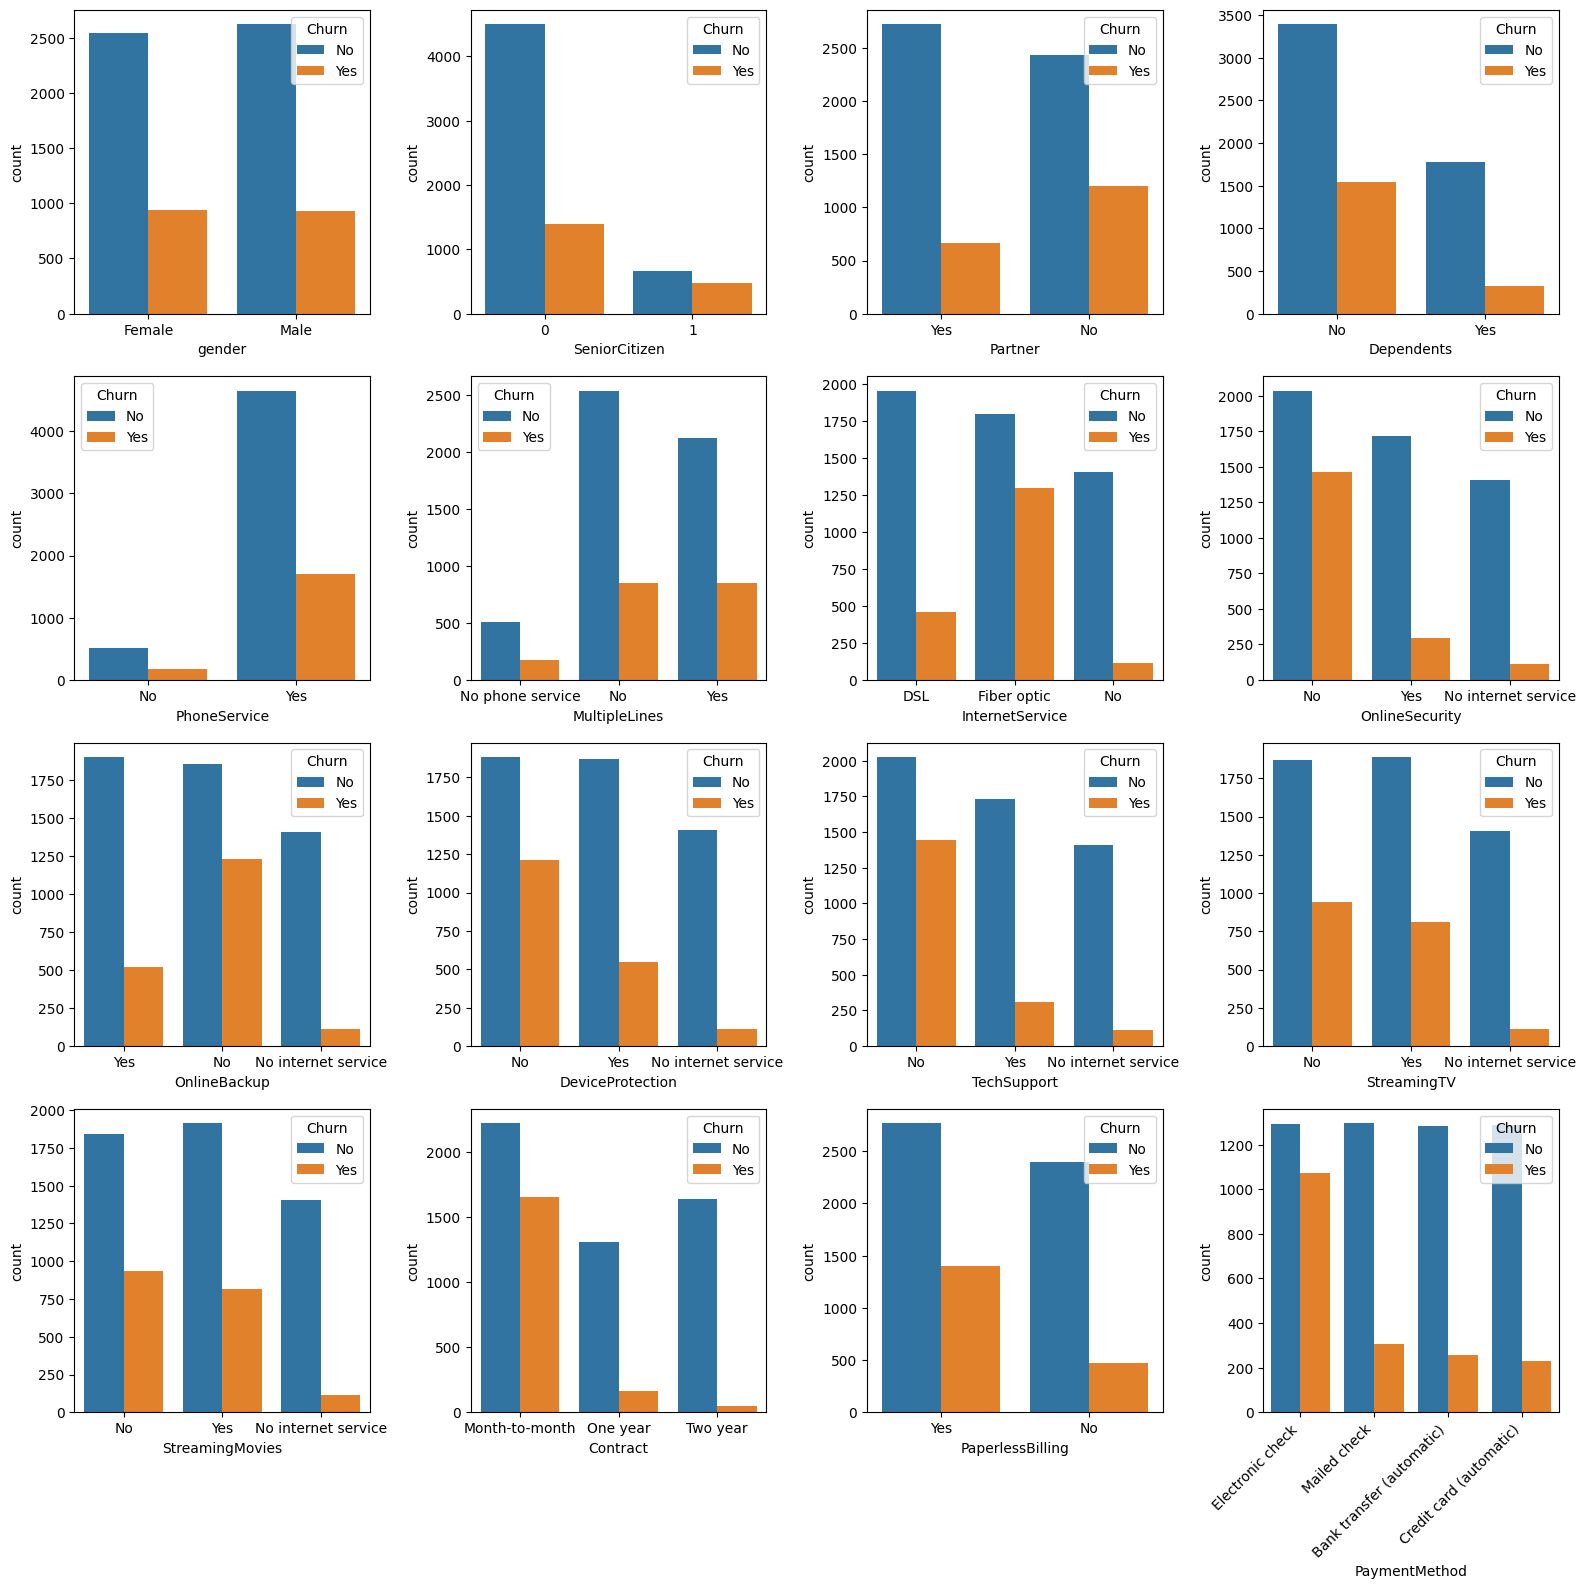

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, col_name in enumerate(category_col[:-1]):
    row = i // 4
    col = i % 4
    sns.countplot(data=df, x=col_name, hue="Churn", ax=axes[row][col])

plt.xticks(rotation=45, ha="right")
fig.tight_layout()
plt.show()

그래프로 알 수 있는 것
- 성별: 남성, 여성 고객 모두 이탈하는 고객 수가 거의 같음.
- 시니어: 고령자에 비해 젊은 고객들이 이탈율이 더 높음.
- 배우자: 배우자가 없는 고객들의 이탈율이 더 높음.
- 부양가족이 없는 경우 이탈율이 더 높음.
- PhoneService와 MultipleLines 카테고리 전체에서 이탈고객은 동일한 비율을 나타냄.
- 광섬유를 InternetService로 사용하는 고객(빠른 인터넷 속도)은 다른 InternetService 방법(느린 인터넷 속도)에 비해 이탈률이 가장 높음.
- OnlineSecurity, OnlineBackup, OnlineProtection 및 TechSupport를 사용하지 않거나 갖고 있지 않은 고객은 나머지 그룹에 비해 이탈할 가능성이 더 높음.
- StreamingMovies와 StreamingTV 기능은 있으나 없으나 비슷한 이탈률을 보여줌.
- 년 계약보다 월별 계약한 고객이 이탈율이 높음.
- PaperlessBilling을 선호하는 고객은 그렇지 않은 고객보다 이탈 확률이 더 높음.
- 거래를 위해 ElectronicChecks를 사용하는 사람들은 그렇지 않은 사람들보다 더 이탈율이 높음.

-> 성별, PhoneService, MultipleLine, StreamingService 는 이탈율과 관계가 없어 보임.

In [18]:
df1 = df.copy(deep = True)

In [19]:
df1["Churn"] = df1["Churn"].map({'No': 0, 'Yes':1})
df1["Churn"].head()

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

아래부터는 이탈한 고객에 대해서 추가 시각화

In [20]:
seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [21]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

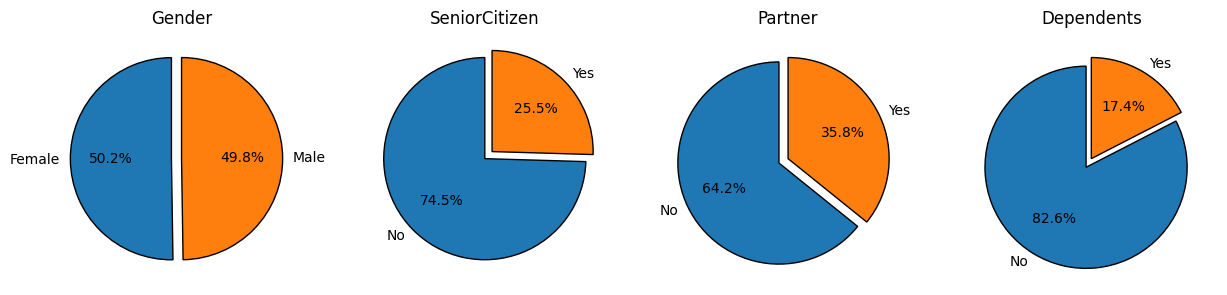

In [22]:
ax,fig = plt.subplots(1,4, figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- 젊은 분들의 이탈율이 높기 때문에 원인을 찾아야 함.
- 배우자나 부양가족이 없는 혼자일 때 이탈율이 더 높은 원인은 무엇일까? - 한국은 가족 묶음 할인 등이 있어서 이탈하기가 쉽지 않은데/ 배우자나 부양가족 등 상대방이 있기에 더 잘 서비스를 이용하기 때문(?)

In [23]:
multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [24]:
multiplelines[0]

850

In [25]:
multiplelines[1]

849

In [26]:
multiplelines[2]

170

In [27]:
internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [28]:
streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

In [29]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice

Yes    1699
No      170
Name: PhoneService, dtype: int64

In [30]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # Yes - No

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # Yes  - No - No Phone Service

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # Fiber Optic No - DSL - No

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] #No  - Yes - No Internet Service

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - Yes - No Internet Service

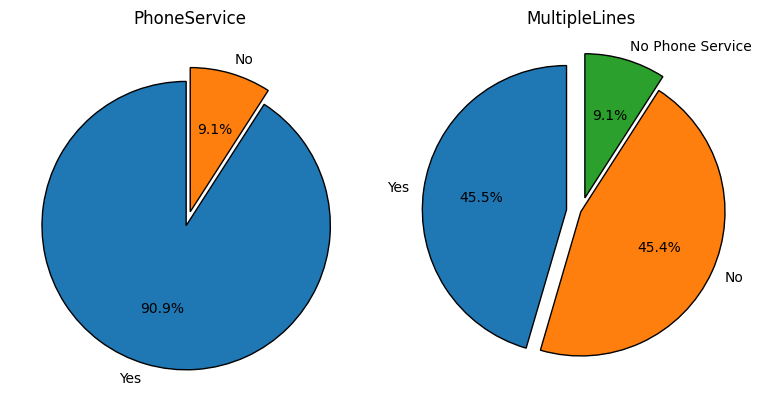

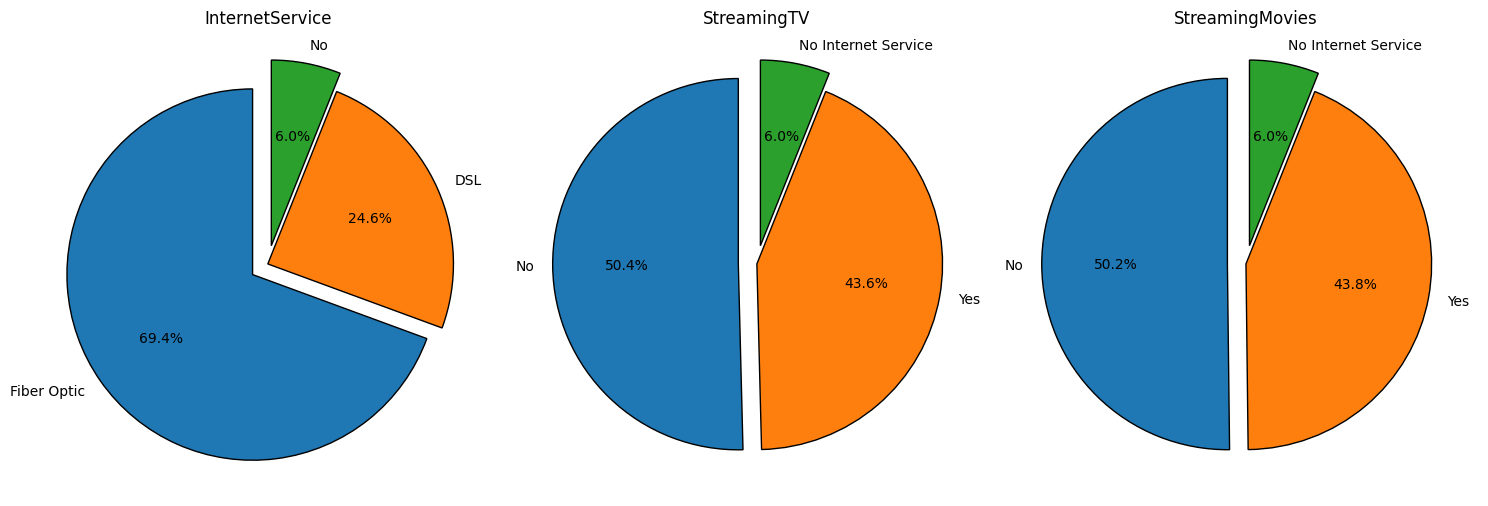

In [31]:
ax,fig = plt.subplots(1,2, figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['Yes', 'No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['Yes','No','No Phone Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.tight_layout()
plt.title('MultipleLines');

ax,fig = plt.subplots(1,3, figsize = (15,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['Fiber Optic','DSL', 'No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.tight_layout()
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.tight_layout()
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.tight_layout()
plt.title('StreamingMovies');

- 이탈한 고객들은 phone service가 있었음.
- 이탈한 고객들은 빠른 속도의 광섬유를 이용했으나, 실제 빠르지 않았던 건지? 비용 부담이 컸던 것인지 이탈함.
- MultiplelLines와 StreamingService는 관계없는 지표.

In [32]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity

No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64

In [33]:
onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup

No                     1233
Yes                     523
No internet service     113
Name: OnlineBackup, dtype: int64

In [34]:
deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection

No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64

In [35]:
techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

In [36]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - Yes - No Internet Service

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - Yes - No Internet Service

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - Yes - No Internet Service

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - Yes - No Internet Service

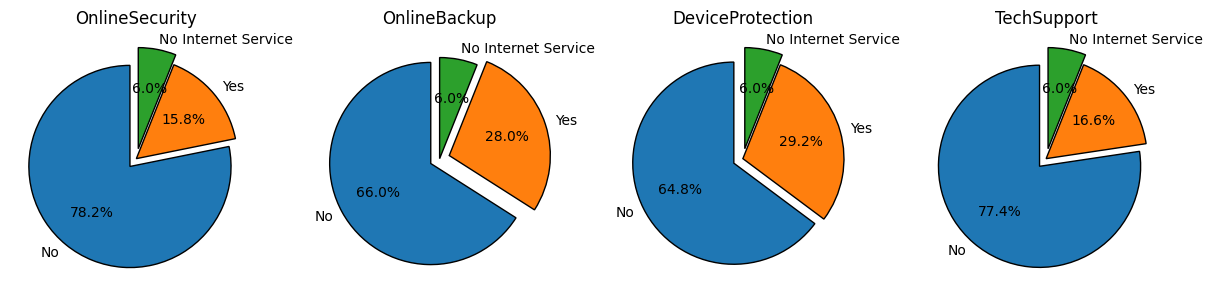

In [37]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No','Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

- 이탈 고객은 온라인 보안 등의 기술지원 서비스를 이용하지 않았음. 이 서비스 자체에 문제는 없겠지만, 만약, 이 서비스를 이용했다면 이탈하지 않았을까? 이 서비스의 요금이 비싼가? 이 서비스를 이용하지 않더라도 보안 서비스는 좋아야 하는거 아닌가..?

In [38]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
print(contract)

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64


In [39]:
print(paperlessbilling)

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64


In [40]:
print(paymentmethod)

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


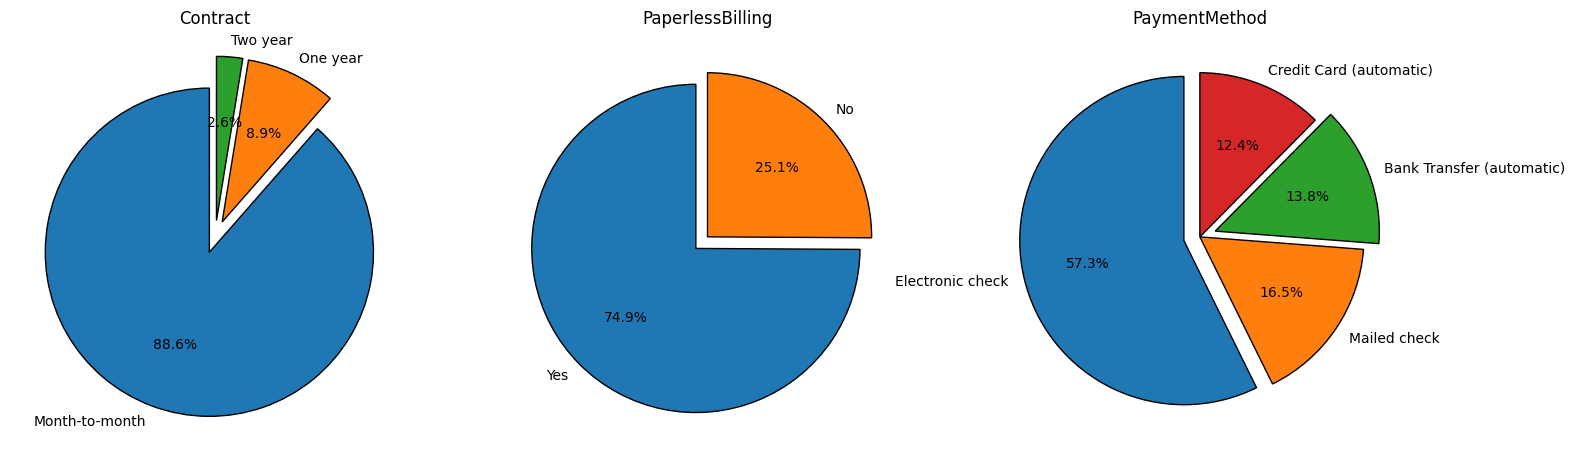

In [41]:
ax,fig = plt.subplots(1,3,figsize = (18,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['Yes', 'No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Electronic check','Mailed check','Bank Transfer (automatic)','Credit Card (automatic)'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- 월 단위 고객이 이탈율이 큼. 아무래도 찍먹하고 나갈 수 있으므로.
- paperlessbilling이라고 해서 이탈하지 않는 것이 아님.
- 다른 결제방식들은 비슷한데, 전자수표 방식에서 이탈율이 크므로 전자수표 방식의 개선이 필요함.

각 서비스에 대한 비용 추측하기

In [42]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

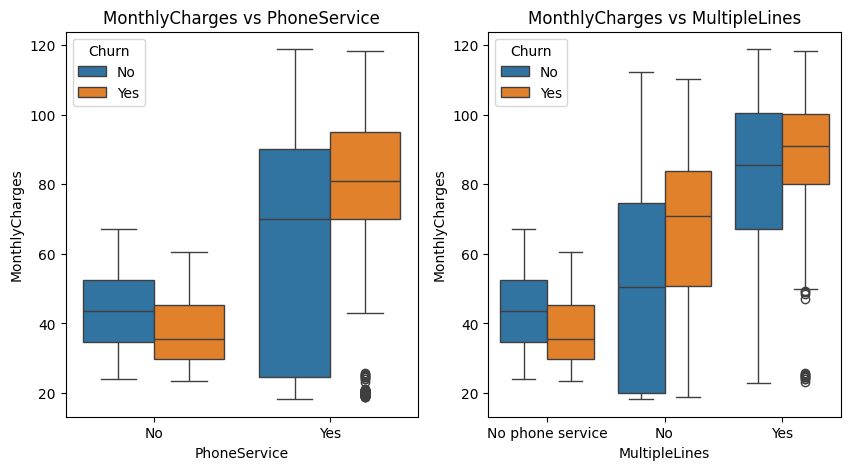

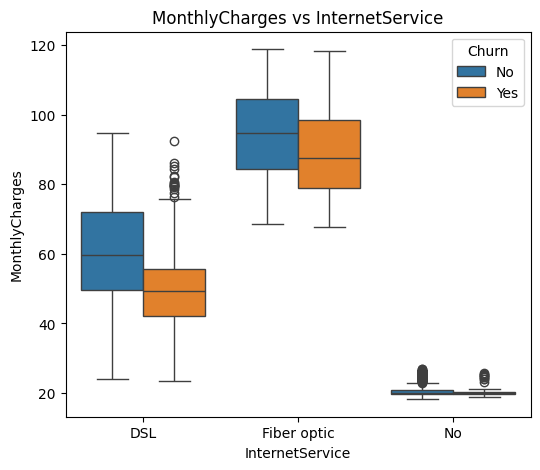

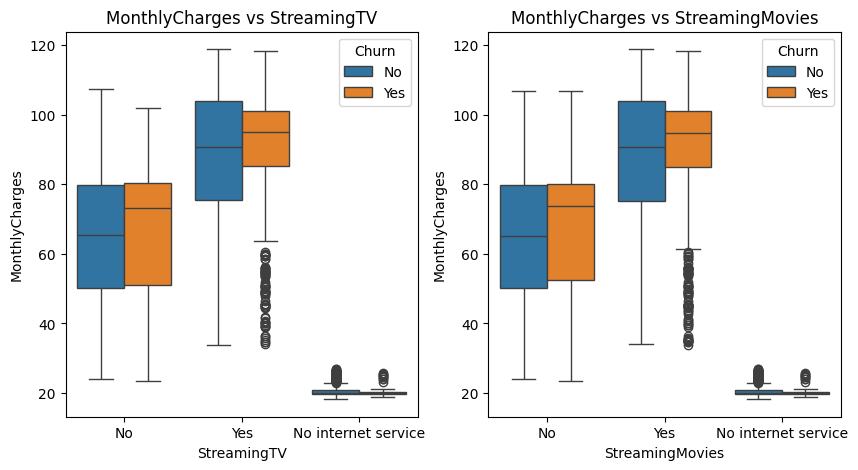

In [43]:
fig = plt.subplots(1, 2,figsize = (10,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = df,hue = 'Churn');
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(1, 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = df,hue = 'Churn');
plt.title('MonthlyCharges vs ' + l2[2]);

fig = plt.subplots(1,2,figsize = (10,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = df,hue = 'Churn');
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

- 광섬유 케이블과 StreamingTV 및 StreamingMovie의 월별 요금은 매우 높으므로, 고객 이탈의 원인이 될 수 있음.
- phoneservice를 이용하는 고객의 월별 요금 편차가 큰데 요금이 높을 수록 이탈 확률이 커짐.

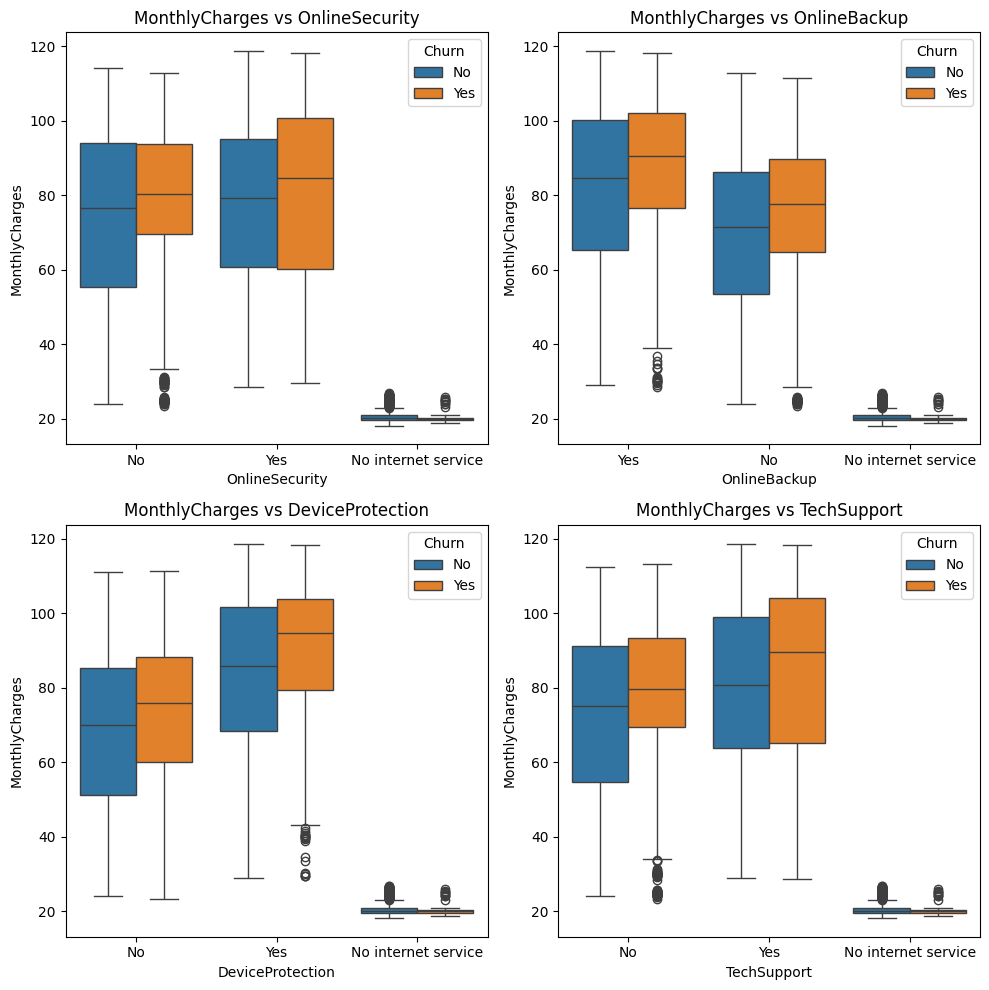

In [44]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'MonthlyCharges',data = df,hue = 'Churn');
    plt.tight_layout()
    plt.title('MonthlyCharges vs ' + l2[i-4]);

- 보안 서비스를 이용하는 고객은 월별 요금과 관계없이 이용함.

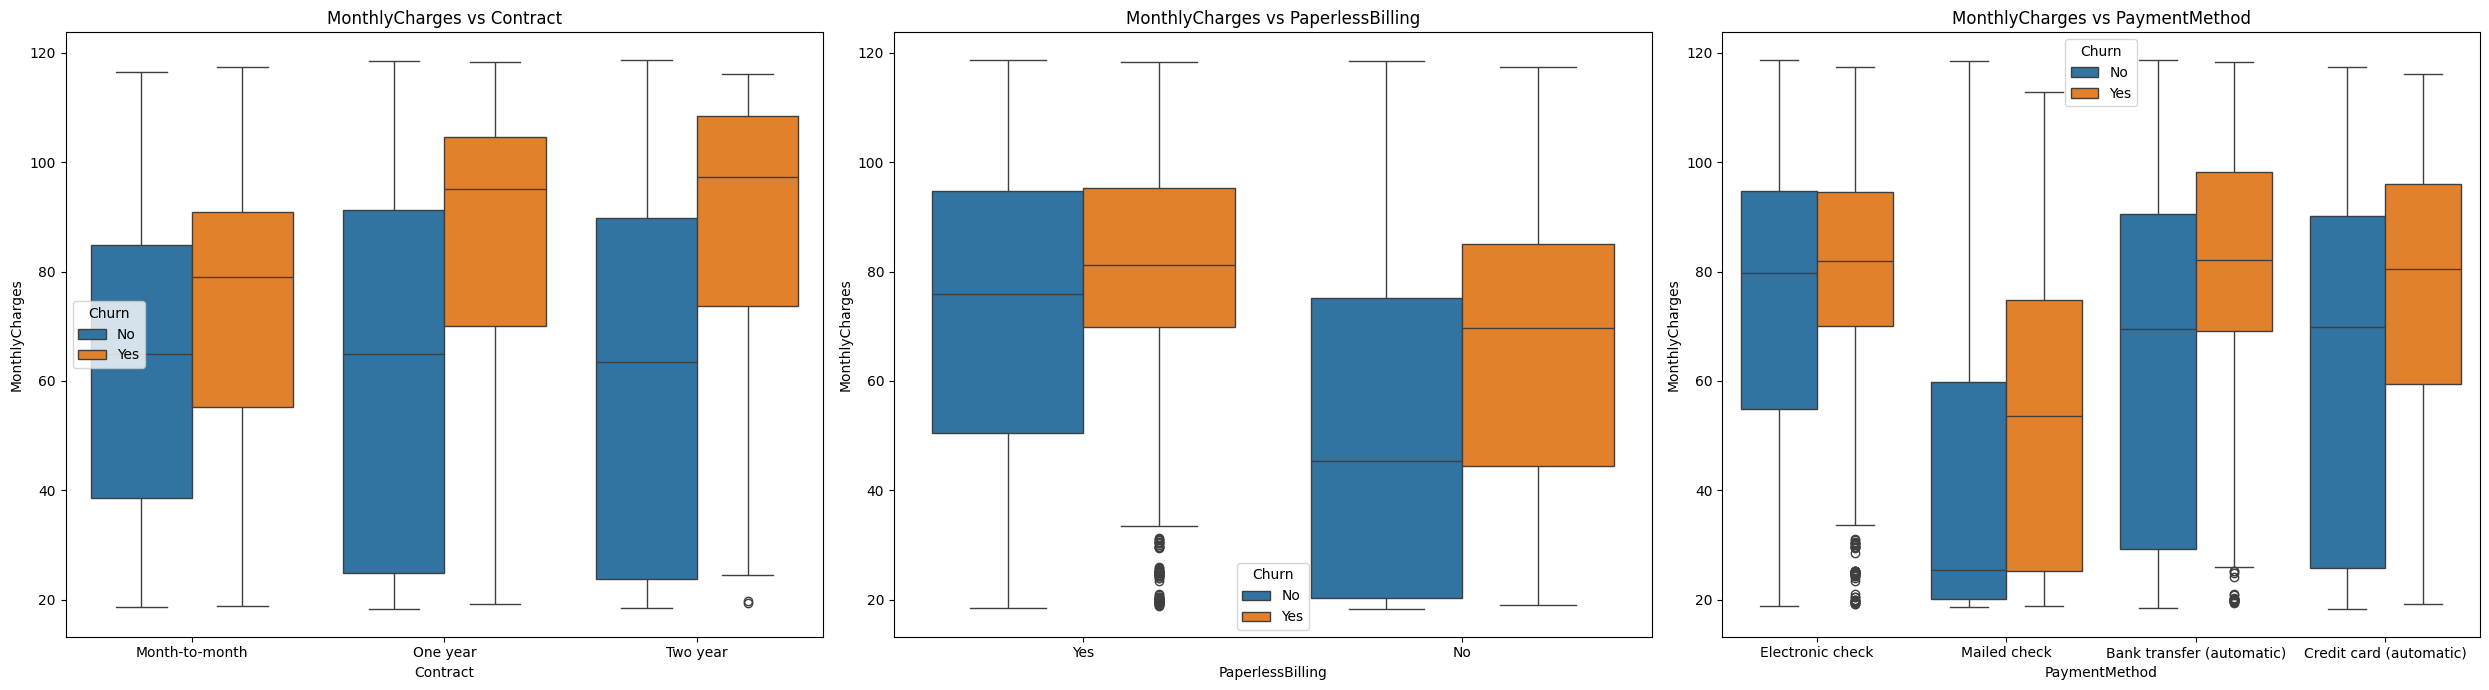

In [45]:
fig = plt.subplots(1,3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'MonthlyCharges',data = df, hue = 'Churn');
    title = 'MonthlyCharges vs ' + l3[i]
    plt.tight_layout()
    plt.title(title);

- 단지 전자수표 내는 분들은 비용이 높아서 전자수표를 냈을 수도 있음.

## 상관관계 분석

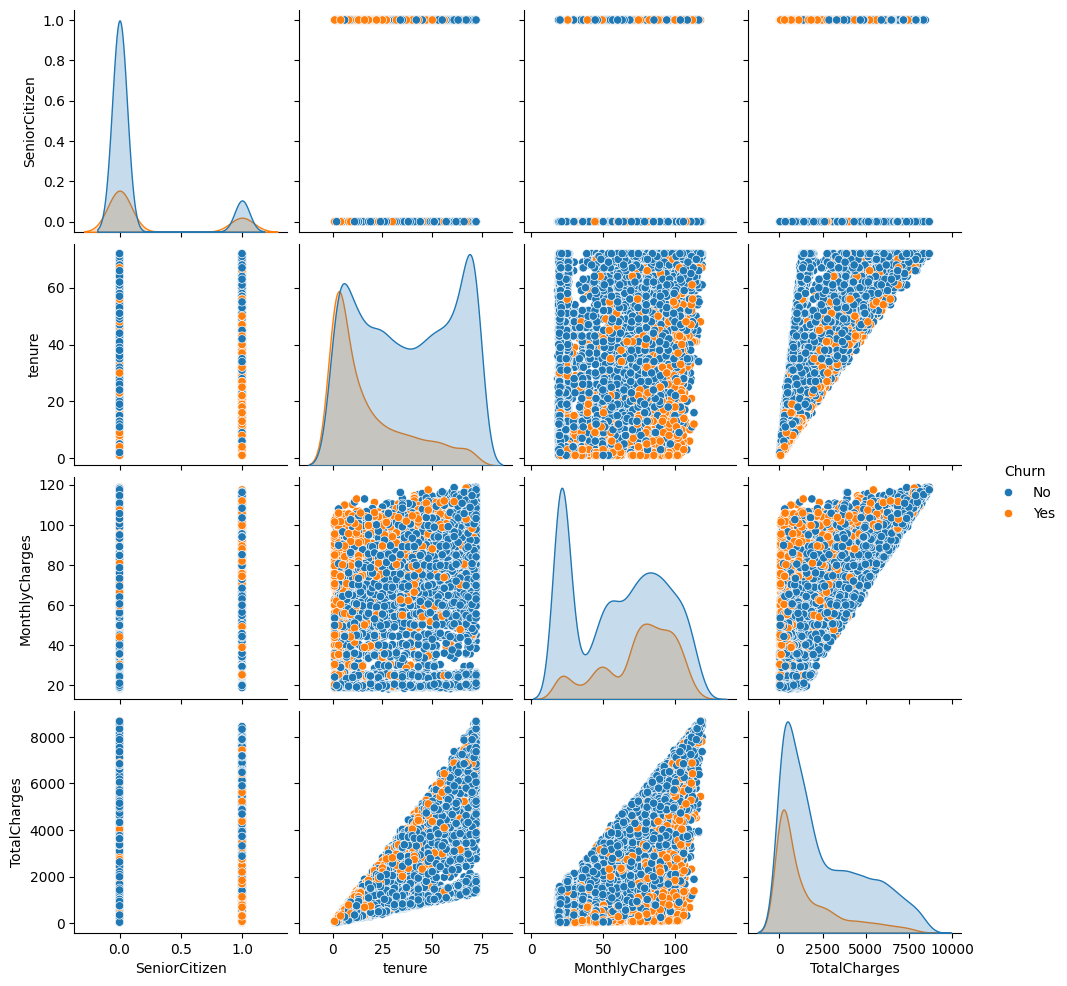

In [46]:
sns.pairplot(df, hue="Churn")
plt.show()

- TotalCharges와 tenure의 관계를 보고, 고객이 더 오랜 기간 계약을 유지할 수록 총 요금이 증가하는 경향이 있다. -> 당연한 얘기

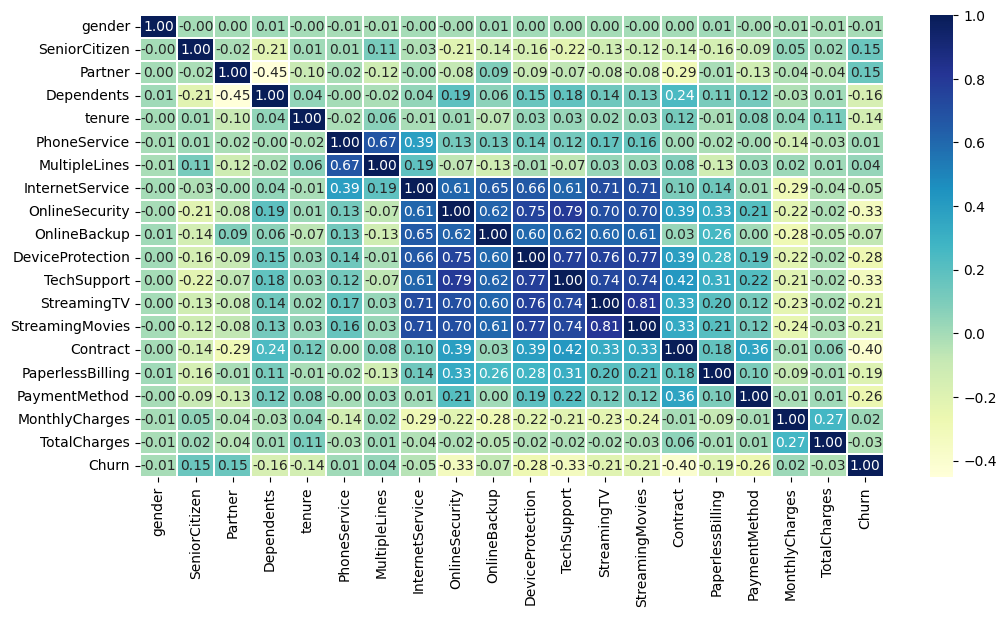

In [47]:
plt.figure(figsize=(12,6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()  #범주형 변수를 숫자로 변환하는 함수(0번 배열은 인코딩된 값을 갖고, 1번 배열은 고유값을 가짐)
sns.heatmap(corr, linewidth=.2, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.1)
plt.show()

- InternetService~StreamingTV 의 변수끼리의 상관관계가 높다.

## feature engineering

In [48]:
# # 그래프가 한쪽으로 치우친 수치형 변수들에 대해 Min-Max Scaler 사용
# mms = MinMaxScaler()
# df1['tenure'] = mms.fit_transform(df1[['tenure']])
# df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
# df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
# df1.head()

In [49]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,
7590-VHVEG,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,0,No,No,34,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,0,No,No,45,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,0,No,No,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [50]:
df_ohe = pd.get_dummies(df1)
df_ohe.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,34,56.95,1889.50,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,2,53.85,108.15,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,45,42.30,1840.75,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## 모델링

In [51]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [53]:
X = df_ohe.drop("Churn", axis=1)
y = df_ohe["Churn"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [55]:
# from imblearn.over_sampling import SMOTE

# # SMOTE 객체 생성
# smote = SMOTE(random_state=42)

# # 오버샘플링 수행
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # 결과 확인
# print('오버샘플링 후 클래스 분포:\n', pd.Series(y_resampled).value_counts())

In [56]:
# from imblearn.under_sampling import RandomUnderSampler

# # RandomUnderSampler 객체 생성
# rus = RandomUnderSampler(random_state=42)

# # 언더샘플링 수행
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# # 결과 확인
# print('언더샘플링 후 클래스 분포:\n', pd.Series(y_resampled).value_counts())

In [57]:
def model(classifier, X_train, X_test, y_train, y_test):

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 42)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, y_pred)))

    # Get the prediction probabilities
    y_score = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)

    plt.plot(fpr, tpr)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier, X_test, y_test):

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)

    # 혼동 행렬을 데이터프레임으로 변환
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'],
                         index=['Actual Negative', 'Actual Positive'])

    # 혼동 행렬 시각화
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # 분류 보고서 출력
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Cross Validation Score :  83.89%
ROC_AUC Score :  66.46%


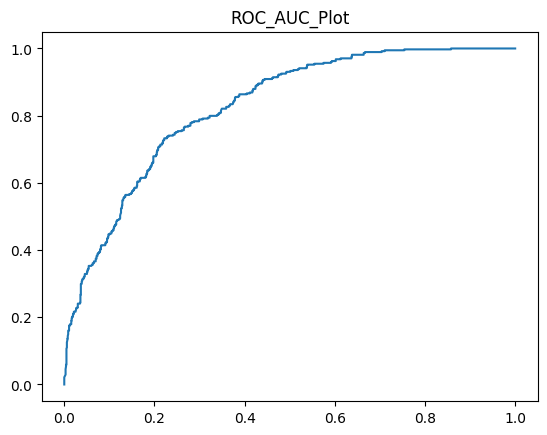

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf, X_train, X_test, y_train, y_test)

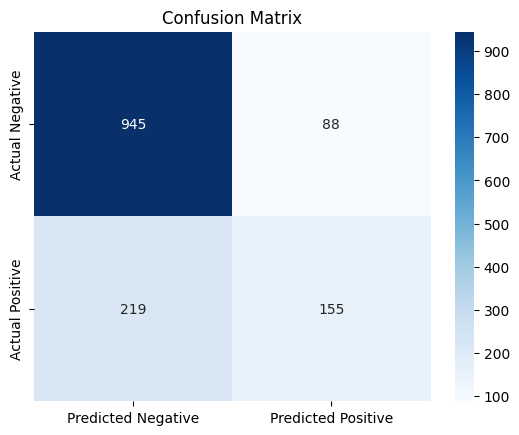

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.64      0.41      0.50       374

    accuracy                           0.78      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



In [59]:
model_evaluation(classifier_rf, X_test, y_test)

In [60]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  84.71%
ROC_AUC Score :  70.33%


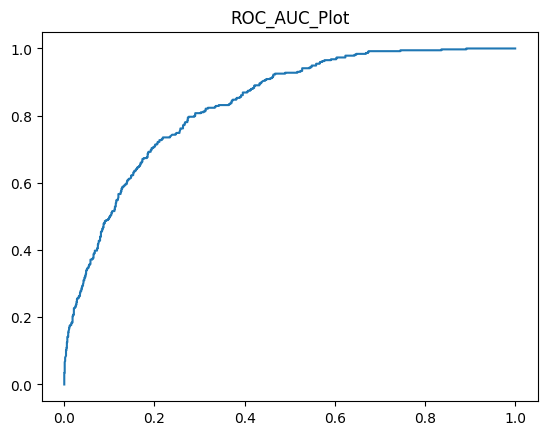

In [61]:
model(classifier_xgb, X_train, X_test, y_train, y_test)

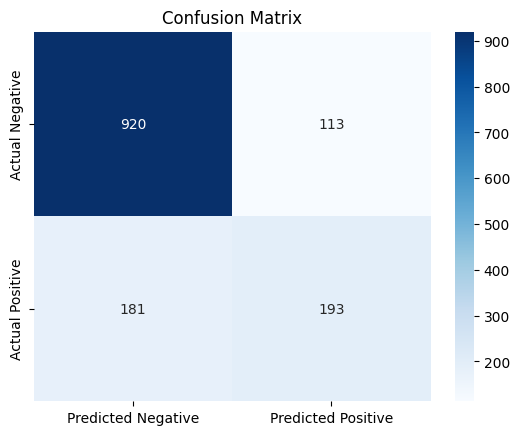

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [62]:
model_evaluation(classifier_xgb, X_test, y_test)

In [ ]:
# from lightgbm import LGBMClassifier

# classifier_lgbm = LGBMClassifier(learning_rate= 0.1,max_depth = 3,n_estimators = 1000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000, max_depth = 4, min_samples_leaf = 1)

Cross Validation Score :  82.68%
ROC_AUC Score :  65.57%


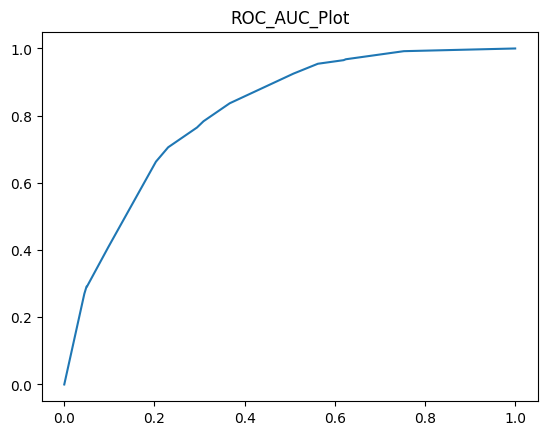

In [ ]:
model(classifier_dt, X_train, X_test, y_train, y_test)

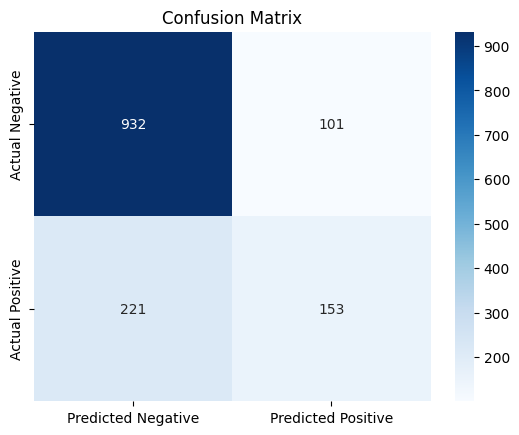

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.60      0.41      0.49       374

    accuracy                           0.77      1407
   macro avg       0.71      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



In [ ]:
model_evaluation(classifier_dt, X_test, y_test)

In [56]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()

param_grid = {
    'iterations': [100, 200, 300],
    'depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
278:	learn: 0.3202718	total: 6.96s	remaining: 524ms
279:	learn: 0.3198936	total: 6.99s	remaining: 499ms
280:	learn: 0.3197060	total: 7.01s	remaining: 474ms
281:	learn: 0.3194225	total: 7.03s	remaining: 449ms
282:	learn: 0.3191832	total: 7.06s	remaining: 424ms
283:	learn: 0.3188891	total: 7.08s	remaining: 399ms
284:	learn: 0.3185792	total: 7.1s	remaining: 374ms
285:	learn: 0.3183322	total: 7.12s	remaining: 349ms
286:	learn: 0.3181017	total: 7.14s	remaining: 324ms
287:	learn: 0.3177592	total: 7.17s	remaining: 299ms
288:	learn: 0.3173760	total: 7.19s	remaining: 274ms
289:	learn: 0.3171487	total: 7.23s	remaining: 249ms
290:	learn: 0.3169345	total: 7.25s	remaining: 224ms
291:	learn: 0.3166785	total: 7.28s	remaining: 199ms
292:	learn: 0.3162540	total: 7.3s	remaining: 174ms
293:	learn: 0.3158717	total: 7.32s	remaining: 149ms
294:	learn: 0.3156134	total: 7.34s	remaining: 124ms
295:	learn: 0.3153533	total: 7.36s	remaining: 99.5ms
296:	learn: 0.3150098	total: 

In [ ]:
best_params01 = grid_search01.best_params_
print("Best Hyperparameters:", best_params01)

In [ ]:
best_catboost01_model = grid_search01.best_estimator_
y_pred = best_catboost01_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)

## Featrue Importance

In [68]:
feature_names = X.columns
feature_names

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

<Axes: xlabel='None', ylabel='None'>

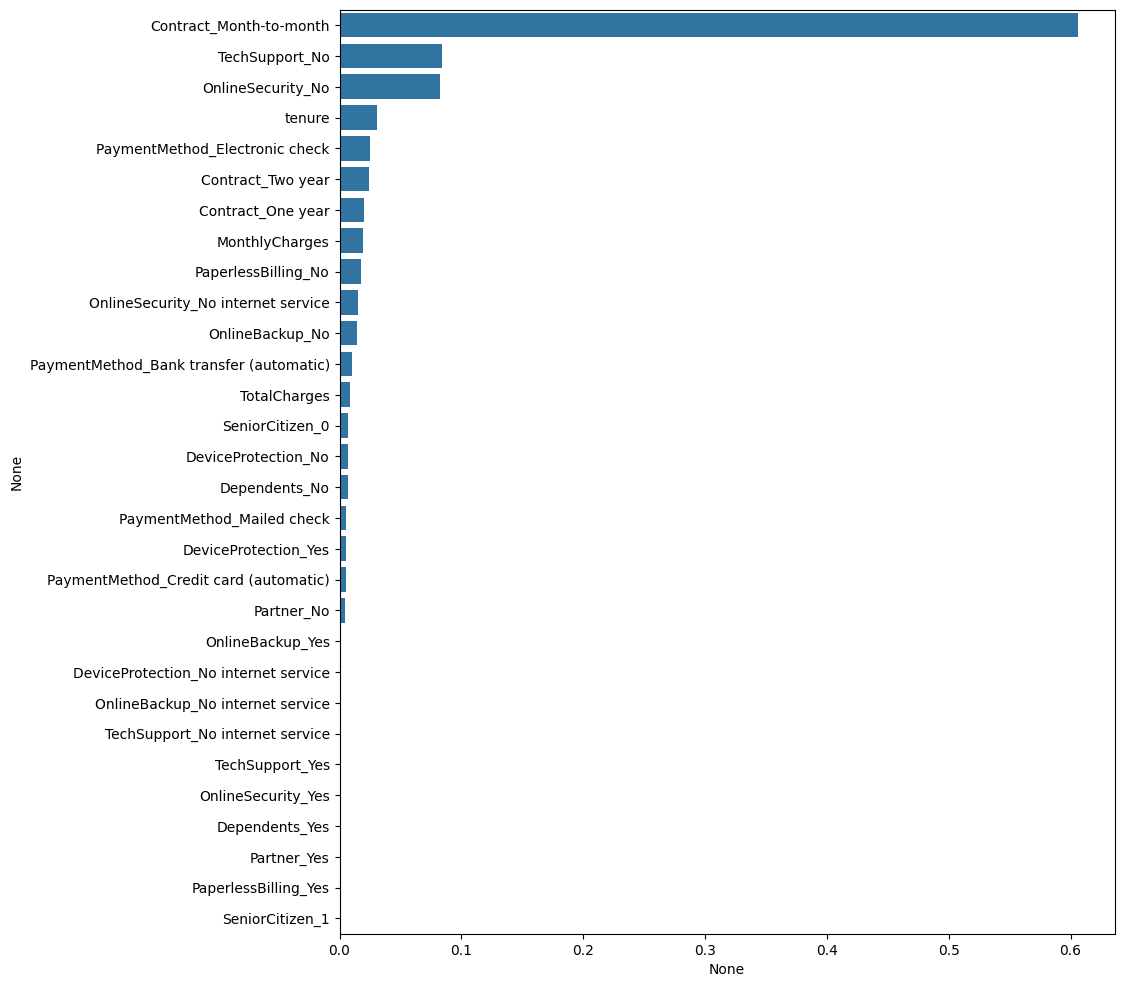

In [70]:
plt.figure(figsize=(10,12))
feature_importances = pd.Series(classifier_xgb.feature_importances_, index=feature_names)
imp_sort = feature_importances.sort_values(ascending=False)
sns.barplot(x=imp_sort, y=imp_sort.index)

#### 최종 의견



- 타겟 마케팅 : 부부나 노부부를 타겟으로 서비스.
- 온라인 보안 등의 서비스를 더 지원해줄 것.
- PhoneService 이용요금의 하향이 필요함(70이하)